In [1]:
from nltk import TweetTokenizer, SnowballStemmer
from nltk.corpus import stopwords
from pymongo import MongoClient
from spellchecker import SpellChecker

from gather_data.config import PASS, LOGIN

import certifi

import emoji
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import openpyxl
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\modze\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Step 0
## Organize variables

In [2]:
ACRONYMS = {
    "cuz": "because",
    "tn": "tonight",
    "dr": "doctor",
    "u": "you",
    "r": "are",
    "ny": "new york",
    "afaik": "as far as i know",
    "bts": "behind the scenes",
    "cba": "can't be bothered",
    "dnd": "do not disturb",
    "eli5": "explain like i'm 5",
    "fomc": "federal open market committee",
    "g2g": "got to go",
    "hmu": "hit me up",
    "kpi": "key performance indicator",
    "nbd": "no big deal",
    "potus": "president of the united states",
    "rip": "rest in peace",
    "tl;dr": "too long; didn't read",
    "atm": "at the moment",
    "imho": "in my humble opinion",
    "ofc": "of course",
    "otw": "on the way",
    "pls": "please",
    "tfw": "that feeling when",
    "ty": "thank you",
    "wth": "what the heck",
    "wysiwyg": "what you see is what you get",
    "yw": "you're welcome",
    "dm": "direct message",
    "rt": "retweet",
    "ct": "cuttweet",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "imo": "in my opinion",
    "brb": "be right back",
    "afk": "away from keyboard",
    "btw": "by the way",
    "rofl": "rolling on the floor laughing",
    "tbh": "to be honest",
    "gtg": "got to go",
    "ily": "i love you",
    "jk": "just kidding",
    "lmao": "laughing my ass off",
    "np": "no problem",
    "omw": "on my way",
    "tgif": "thank god it's friday",
    "wtf": "what the fuck",
    "idk": "i don't know",
    "fyi": "for your information",
    "asap": "as soon as possible",
    "bff": "best friends forever",
    "gg": "good game",
    "hbd": "happy birthday",
    "irl": "in real life",
    "nvm": "never mind",
    "ootd": "outfit of the day",
    "roflmao": "rolling on the floor laughing my ass off",
    "smh": "shaking my head",
    "tbt": "throwback thursday",
    "yolo": "you only live once",
    "ama": "ask me anything",
    "fwiw": "for what it's worth",
    "icymi": "in case you missed it",
    "ootw": "outfit of the week",
    "pos": "piece of shit",
    "rn": "right now",
    "tmi": "too much information",
    "ttyl": "talk to you later",
    "wcw": "woman crush wednesday",
    "wyd": "what are you doing",
    "xoxo": "hugs and kisses",
    "fomo": "fear of missing out",
    "lmk": "let me know",
    "nm": "not much",
    "nsfw": "not safe for work",
    "ootn": "outfit of the night",
    "smdh": "shaking my damn head",
    "til": "today i learned",
    "wdyt": "what do you think",
    "prt": "partial retweet",
    "mt": "modified tweet",
    "cx": "correction",
    "seo": "search engine optimization",
    "sroi": "social return on investment",
    "sn": "social network",
    "yt": "youtube",
    "ugc": "user-generated content",
    "smo": "social media optimization",
    "fb": "facebook",
    "sm": "social media",
    "smm": "social media marketing",
    "ezine": "electronic magazine",
    "bgd": "background",
    "abt": "about",
    "ab": "about",
    "dd": "dear daughter",
    "ayfkmwts": "are you f—ing kidding me with this s—?",
    "br": "best regards",
    "chk": "check",
    "cul8r": "see you later",
    "dp": "display picture",
    "fml": "fuck my life",
    "fubar": "fucked up beyond all repair",
    "bbfn": "bye for now",
    "b4": "before",
    "ds": "dear son",
    "ema": "email address",
    "dyk": "do you know",
    "f2f": "face to face",
    "ftf": "face to face",
    "hagn": "have a good night",
    "df": "dear fiancé",
    "dam": "don't annoy me",
    "ffs": "for fuck sake",
    "em": "email",
    "eml": "email",
    "fotd": "find of the day",
    "ftw": "for the win",
    "hth": "hope that helps",
    "gmafb": "give me a f—ing break",
    "hand": "have a nice day",
    "gtfooh": "get the fuck out of here",
    "gts": "guess the song",
    "hotd": "headline of the day",
    "iirc": "if i remember correctly",
    "kyso": "knock your socks off",
    "kk": "ok",
    "ht": "head through",
    "ic": "i see",
    "lhh": "hella hard (a stronger version of lol)",
    "zomg": "omg to the max",
    "nfw": "no f—ing way",
    "orly": "oh, really?",
    "yoyo": "you're on your own",
    "iwsn": "i want sex now",
    "jv": "joint venture",
    "lo": "little one",
    "jsyk": "just so you know",
    "nsw": "not safe work",
    "mrjn": "marijuana",
    "mirl": "meet in real life",
    "nct": "nobody cares, though",
    "njoy": "enjoy",
    "omfg": "oh my f—ing god",
    "pnp": "party and play (drugs and sex)",
    "qotd": "quote of the day",
    "sfw": "safe for work",
    "oomf": "one of my friends/followers",
    "nts": "note to self",
    "rtfm": "read the f—ing manual",
    "snafu": "situation normal, all f—ed up",
    "rlrt": "real-life re-tweet, a close cousin to oh",
    "stfw": "search the f—ing web!",
    "tftt": "thanks for this tweet",
    "sob": "son of a b—-",
    "tftf": "thanks for the follow",
    "rtq": "significant other",
    "tj": "tweetjack, or joining a conversation belatedly to contribute to a tangent",
    "srs": "serious",
    "stf": "shut the f—",
    "stfu": "shut the f— up!",
    "tl": "timeline",
    "tyia": "thank you in advance",
    "tt": "trending topic",
    "tldr": "too long didn’t read",
    "tmb": "tweet me back",
    "tyvw": "thank you very much",
    "wtv": "whatever",
    "ymmv": "your mileage may vary",
    "ykyat": "you know you’re addicted to",
    "w/e": "whatever",
    "tyt": "take your time",
    "ykwim": "you know what i mean",
    "ygtr": "you got that right",
    "li": "linkedin",
    "ppl": "people",
    "re": "reply",
    "s/o": "shout out",
    "ig": "instagram",
    "cmv": "change my view",
    "fbf": "flashback friday",
    "oc": "original content",
    "wbw": "way back wednesday",
    "eta": "estimated time of arrival",
    "smart": "specific, measurable, attainable, relevant, timely",
    "smp": "social media platform"
}
STOPWORDS = stopwords.words('english')
CLEANING_REGEX = "[@#]\w+|https?:\S+|<\w+>|\S+@\w+.\w+|[^A-Za-z]"


# Step 1
## Get the data from MongoDB

In [3]:
# Loading data from MongoDB


df = pd.read_csv(r"C:\Users\modze\PycharmProjects\TwitterAnalysis\files\training.1600000.processed.noemoticon.csv",encoding = "ISO-8859-1")
processed_df = pd.DataFrame()
df.columns = ["label", "time", "date", "query", "username", "text"]

# Preparing dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
df.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# Step 2
## Preprocess text data

In [ ]:
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()


def preprocess(text, emojis=True):
    if emojis:
        text = emoji.demojize(text, delimiters=("", ""))
    text = re.sub(CLEANING_REGEX, ' ', str(text).lower()).strip()
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    tokens = tokenizer.tokenize(text)


    for i in range(len(tokens)):
        if tokens[i] in ACRONYMS:
            expanded_tokens = ACRONYMS[tokens[i]].split()
            tokens[i:i + 1] = expanded_tokens

    tokens = [token for token in tokens if token not in STOPWORDS if token if len(token) > 1]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens


df["preprocessed_text"] = df["text"].apply(lambda text: preprocess(text))
df["preprocessed_text"].dropna()
df["token_count"] = df["preprocessed_text"].apply(lambda x: len(x))
df.drop(df[df["token_count"] < 2].index, inplace=True)

In [25]:

# Function to untokenize the text
def untokenize_text(tokens):
    return ' '.join(tokens)


# Apply the untokenize function to the 'text' column
df['untokenized_text'] = df['preprocessed_text'].apply(untokenize_text)

# Print the DataFrame
print(df['untokenized_text'])


0          upset update facebook texting might cry result...
1            dived many time ball managed save rest go bound
2                            whole body feel itchy like fire
3                                           behaving mad see
4                                                 whole crew
                                 ...                        
1599993    yeah work better waiting end wonder time keep ...
1599994                        woke school best feeling ever
1599995              thewdb com cool hear old walt interview
1599996                       ready mojo makeover ask detail
1599997     happy th birthday boo al time tupac amaru shakur
Name: untokenized_text, Length: 1536716, dtype: object


In [26]:
df[["text", "preprocessed_text"]]

,text,preprocessed_text
0,is upset that he can't update his Facebook by ...,"[upset, update, facebook, texting, might, cry,..."
1,@Kenichan I dived many times for the ball. Man...,"[dived, many, time, ball, managed, save, rest,..."
2,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
3,"@nationwideclass no, it's not behaving at all....","[behaving, mad, see]"
4,@Kwesidei not the whole crew,"[whole, crew]"
...,...,...
1599993,"@Cliff_Forster Yeah, that does work better tha...","[yeah, work, better, waiting, end, wonder, tim..."
1599994,Just woke up. Having no school is the best fee...,"[woke, school, best, feeling, ever]"
1599995,TheWDB.com - Very cool to hear old Walt interv...,"[thewdb, com, cool, hear, old, walt, interview]"
1599996,Are you ready for your MoJo Makeover? Ask me f...,"[ready, mojo, makeover, ask, detail]"


In [27]:
from collections import Counter

token_counts = Counter()

for tokens in df['preprocessed_text']:
    token_counts.update(tokens)
sum = 0
for token, count in token_counts.items():
    sum += 1
print(sum)

222504


# Step 3
## Analyze data

In [28]:
#Analiza danych
word_counts = df['preprocessed_text'].explode().value_counts().sort_values(ascending=False)
most_common_words = word_counts.head(50)  # Przykład: wybierz 5 najczęściej występujących słów
print(most_common_words)

significant    165643
day            111960
good            91334
get             86364
weekend         83423
like            79686
go              78883
today           73264
quot            71763
love            69684
work            68049
time            65899
going           64554
got             61676
one             57651
back            57507
laugh           57194
know            56186
loud            55744
im              50598
really          50187
amp             48660
want            48353
see             46424
night           45855
new             43942
think           43779
still           43498
overheard       43283
well            42815
need            40875
home            40775
reply           40053
thanks          37855
much            37352
miss            36689
last            35936
feel            35445
morning         35126
make            34742
hope            34674
tomorrow        34402
twitter         33797
great           33647
haha            31491
way       

In [19]:
# create world cloud based on sentiment and topics

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from nltk.sentiment import SentimentIntensityAnalyzer
#
# # Create a dictionary to store word frequencies for each topic and sentiment
# topic_sentiment_word_freq = {}
#
# # Initialize Vader SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
#
# # Iterate over rows in the DataFrame
# for index, row in df.iterrows():
#     topic = row['topic']
#     text = row['untokenized_text']
#
#     # Calculate sentiment score using Vader
#     sentiment_scores = sia.polarity_scores(text)
#
#     # Determine sentiment label based on the compound score
#     if sentiment_scores['compound'] >= 0.05:
#         sentiment_label = 'Positive'
#     elif sentiment_scores['compound'] <= -0.05:
#         sentiment_label = 'Negative'
#     else:
#         sentiment_label = 'Neutral'
#
#     # Calculate word frequencies for the current topic and sentiment
#     if topic not in topic_sentiment_word_freq:
#         topic_sentiment_word_freq[topic] = {}
#     if sentiment_label not in topic_sentiment_word_freq[topic]:
#         topic_sentiment_word_freq[topic][sentiment_label] = {}
#
#     # Process the preprocessed text and update word frequencies
#     for word in text.split():
#         if word in topic_sentiment_word_freq[topic][sentiment_label]:
#             topic_sentiment_word_freq[topic][sentiment_label][word] += 1
#         else:
#             topic_sentiment_word_freq[topic][sentiment_label][word] = 1
#
# # Generate WordCloud for each topic and sentiment
# for topic, sentiment_word_freq in topic_sentiment_word_freq.items():
#     for sentiment, word_freq in sentiment_word_freq.items():
#         wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
#
#         # Plot the WordCloud for the current topic and sentiment
#         plt.figure(figsize=(10, 6))
#         plt.imshow(wordcloud, interpolation="bilinear")
#         plt.axis("off")
#         plt.title(f"Word Cloud for {topic} ({sentiment} Sentiment)")
#         plt.show()

0         thought tipoff time wrong caitlin clark logo k...
1         want say louisville hot think great coach cait...
2         remember deep pandemic time weekend latching o...
4         sure want former concordia prof ex globe gazet...
5                    walmart lowes food harris teeter maybe
                                ...                        
142653    ok significant doom demon heretical dungeon dr...
142654    good something get hope botw favorite game eve...
142655    botw didnt blow away running like shit would b...
142656                              gerudo valley link botw
142657    seriousness since botw already unlocks invento...
Name: untokenized_text, Length: 86416, dtype: object


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Initialize empty lists for positive and negative words
positive_words = []
negative_words = []

# Iterate over preprocessed texts and classify sentiment using VADER
for text in df['untokenized_text']:
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        positive_words.extend(text.split())
    elif sentiment_scores['compound'] <= -0.05:
        negative_words.extend(text.split())

# Create word clouds for positive and negative words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

# Plot and display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')

plt.tight_layout()
plt.show()

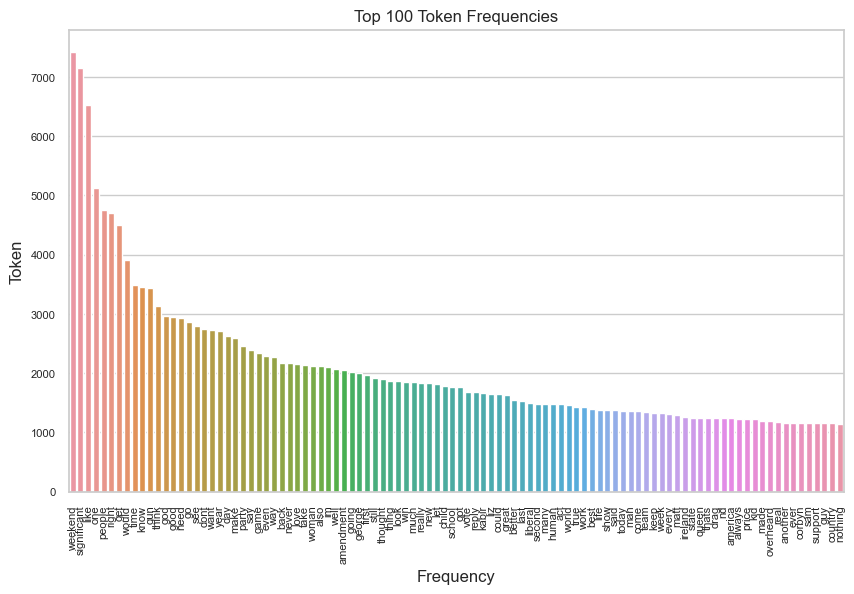

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Example DataFrame with tokenized text column

# Function to calculate token frequencies
def calculate_token_frequencies(tokens):
    token_freq = {}
    for sentence_tokens in tokens:
        for token in sentence_tokens:
            if token in token_freq:
                token_freq[token] += 1
            else:
                token_freq[token] = 1
    return token_freq


# Apply the calculate_token_frequencies function to the 'tokens' column
token_frequencies = calculate_token_frequencies(df["preprocessed_text"])

# Convert token frequencies to DataFrame
token_freq_df = pd.DataFrame.from_dict(token_frequencies, orient='index', columns=['frequency'])
token_freq_df = token_freq_df.reset_index().rename(columns={'index': 'token'})

# Sort DataFrame by token frequency in descending order
token_freq_df = token_freq_df.sort_values('frequency', ascending=False)

# Slice the DataFrame to include only the top 100 token frequencies
token_freq_df = token_freq_df.head(100)

# Plot the token frequencies
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='token', y='frequency', data=token_freq_df)
plt.title('Top 100 Token Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Token')
plt.xticks(rotation=90, fontsize=8)  # Rotate tick labels by 90 degrees
plt.yticks(fontsize=8)
# Replace y-axis labels with token counts

plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Pobieranie zbioru stop words (słów pomijanych przy analizie)
nltk.download('stopwords')

# Pobieranie narzędzi tokenizacji
nltk.download('punkt')

# Przykładowy tekst do analizy
text = "This is a sample text. It contains some words that we want to analyze."

# Tokenizacja tekstu na pojedyncze słowa
tokens = word_tokenize(text)

# Usunięcie stop words (słów pomijanych przy analizie)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Obliczenie częstości występowania słów
freq_dist = FreqDist(filtered_tokens)

# Wyświetlenie 10 najczęściej występujących słów
top_words = freq_dist.most_common(10)
for word, frequency in top_words:
    print(f"{word}: {frequency}")
